In [26]:
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import math
%matplotlib inline

In [46]:
outdir="wos_processed_data"

wos = pd.read_excel(f"{outdir}/wos_processed.xlsx")

wos_addresses = pd.read_excel(f"{outdir}/wos_addresses.xlsx")

wos_affiliations = pd.read_excel(f"{outdir}/wos_affiliations.xlsx")

wos_author_locations = pd.read_excel(f"{outdir}/wos_author_locations.xlsx")

wos_univ_locations = pd.read_excel(f"{outdir}/wos_univ_locations.xlsx")

In [5]:
record_col = record_col="UT (Unique WOS ID)"

# Output - per yer, by Metrix taxonomy

## Domains

In [6]:
group = 'Domain_English'
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=record_col)
data

Domain_English  UT (Unique WOS ID)
0            Applied Sciences                5379
5            Natural Sciences                1649
3             Health Sciences                1106
2  Economic & Social Sciences                 289
4               Miscellaneous                 156
1           Arts & Humanities                  13

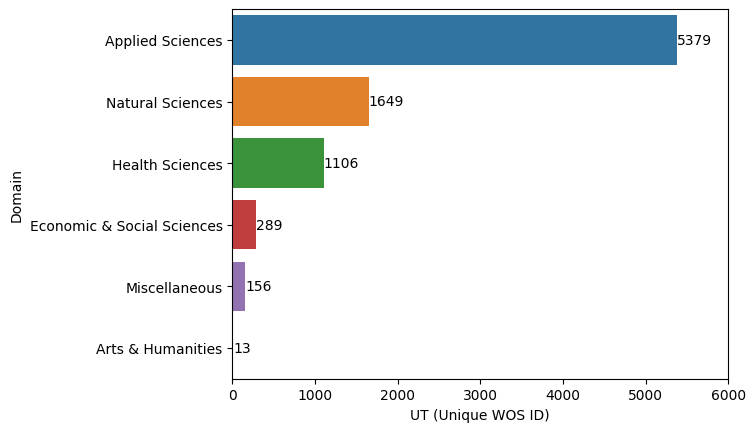

In [16]:
g = sns.barplot(data, x=record_col, y=group)
g.set_xlim(0,6000)
g.set_ylabel("Domain")
for i in g.containers:
    g.bar_label(i,)

In [17]:
group = ['Publication Year','Domain_English']
data = wos.groupby(group)[record_col].nunique().unstack(fill_value=0).stack().reset_index().rename(columns={0:record_col}).sort_values(ascending=False, by=group+[record_col])
data

Publication Year              Domain_English  UT (Unique WOS ID)
65              2022            Natural Sciences                 524
64              2022               Miscellaneous                  41
63              2022             Health Sciences                 368
62              2022  Economic & Social Sciences                 106
61              2022           Arts & Humanities                   4
..               ...                         ...                 ...
4               2012               Miscellaneous                   3
3               2012             Health Sciences                   2
2               2012  Economic & Social Sciences                   0
1               2012           Arts & Humanities                   0
0               2012            Applied Sciences                  21

[66 rows x 3 columns]

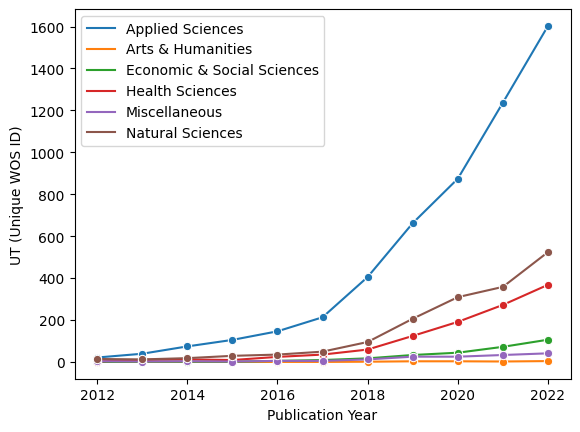

In [22]:
g=sns.lineplot(data.sort_values(ascending=True, by=group[-1]),y=record_col,x=group[0], hue=group[-1], marker="o")
g.set(xticks=list(range(2012,2022+1,2)))
g.legend(title=None)

## Field

In [24]:
group = ['Publication Year',"Domain_English",'Field_English']
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=group+[record_col])
data

Publication Year    Domain_English   
176              2022  Natural Sciences  \
175              2022  Natural Sciences   
174              2022  Natural Sciences   
173              2022  Natural Sciences   
172              2022  Natural Sciences   
..                ...               ...   
4                2012     Miscellaneous   
3                2012   Health Sciences   
2                2012  Applied Sciences   
1                2012  Applied Sciences   
0                2012  Applied Sciences   

                                Field_English  UT (Unique WOS ID)  
176                       Physics & Astronomy                 205  
175                  Mathematics & Statistics                  61  
174            Earth & Environmental Sciences                 134  
173                                 Chemistry                  81  
172                                   Biology                  43  
..                                        ...                 ...  
4                               Miscellaneous                   3  
3                           Clinical Medicine                   2  
2    Information & Communication Technologies                  14  
1                                 Engineering                   5  
0           Agriculture, Fisheries & Forestry                   2  

[177 rows x 4 columns]

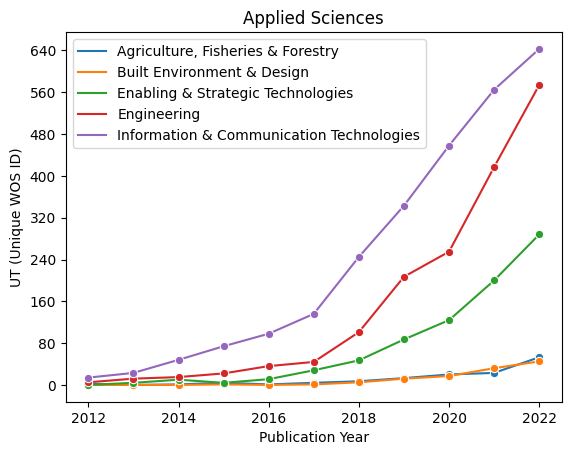

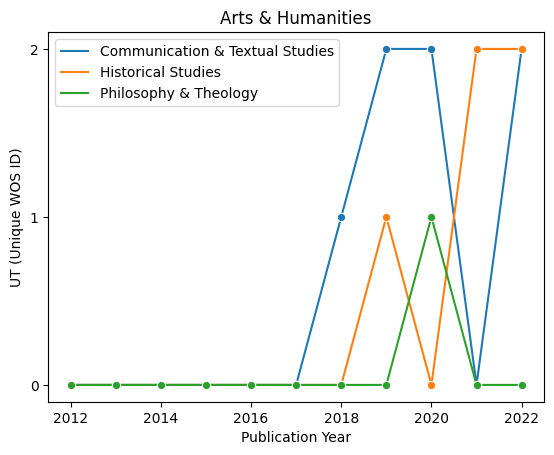

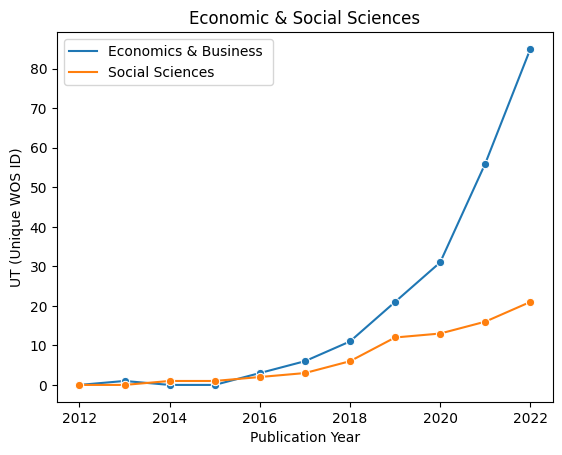

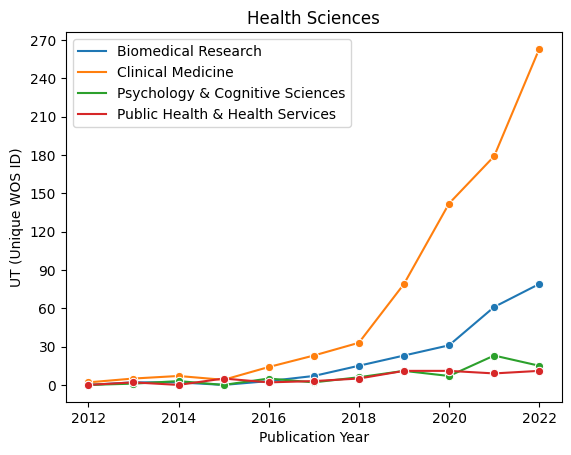

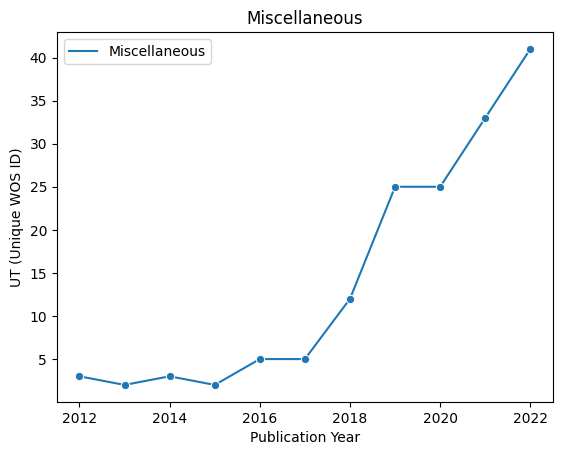

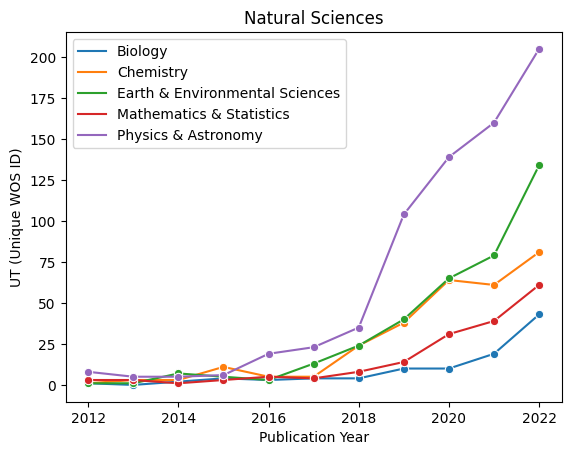

In [28]:
for cat in sorted(data[group[-2]].unique()):
    #data segment
    sub_data = data[data[group[-2]]==cat]
    sub_data = sub_data.complete({group[0]:range(int(data[group[0]].min()), int(data[group[0]].max()) + 1)}
                                 ,group[-1],fill_value=0)
    #plot
    g=sns.lineplot(sub_data.sort_values(ascending=True, by=group[-1]),
                   y=record_col,x=group[0], hue=group[-1], marker="o")
    g.set(xticks=list(range(2012,2022+1,2)))
    g.legend(title=None)
    g.set_title(cat)
    g.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

## SubField

In [29]:
group = ['Publication Year',"Domain_English",'Field_English',"SubField_English"]
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=group+[record_col])
data

Publication Year    Domain_English   
774              2022  Natural Sciences  \
773              2022  Natural Sciences   
772              2022  Natural Sciences   
771              2022  Natural Sciences   
770              2022  Natural Sciences   
..                ...               ...   
4                2012  Applied Sciences   
3                2012  Applied Sciences   
2                2012  Applied Sciences   
1                2012  Applied Sciences   
0                2012  Applied Sciences   

                                Field_English   
774                       Physics & Astronomy  \
773                       Physics & Astronomy   
772                       Physics & Astronomy   
771                       Physics & Astronomy   
770                       Physics & Astronomy   
..                                        ...   
4    Information & Communication Technologies   
3                                 Engineering   
2                                 Engineering   
1                                 Engineering   
0           Agriculture, Fisheries & Forestry   

                               SubField_English  UT (Unique WOS ID)  
774                                      Optics                  56  
773                  Nuclear & Particle Physics                  28  
772                        Mathematical Physics                   2  
771                             General Physics                  14  
770                            Fluids & Plasmas                  21  
..                                          ...                 ...  
4    Artificial Intelligence & Image Processing                  10  
3           Mechanical Engineering & Transports                   1  
2           Industrial Engineering & Automation                   3  
1            Geological & Geomatics Engineering                   1  
0                                  Food Science                   2  

[775 rows x 5 columns]

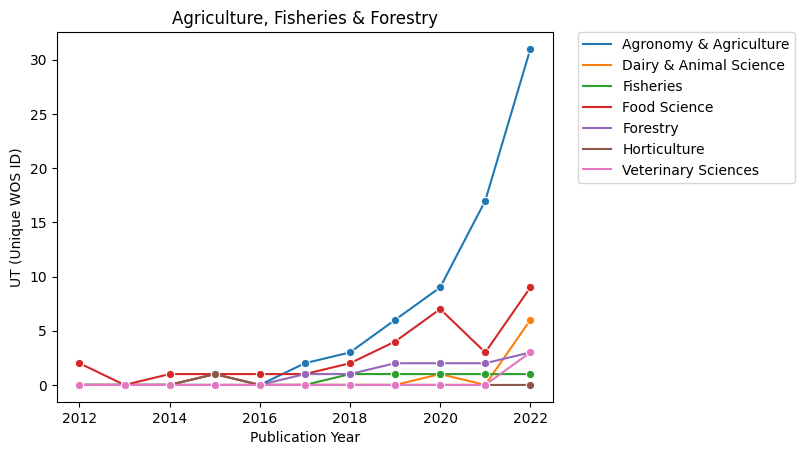

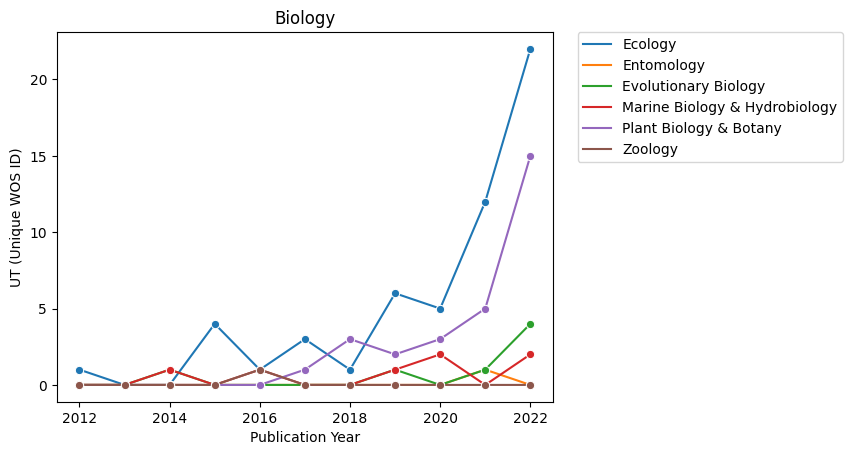

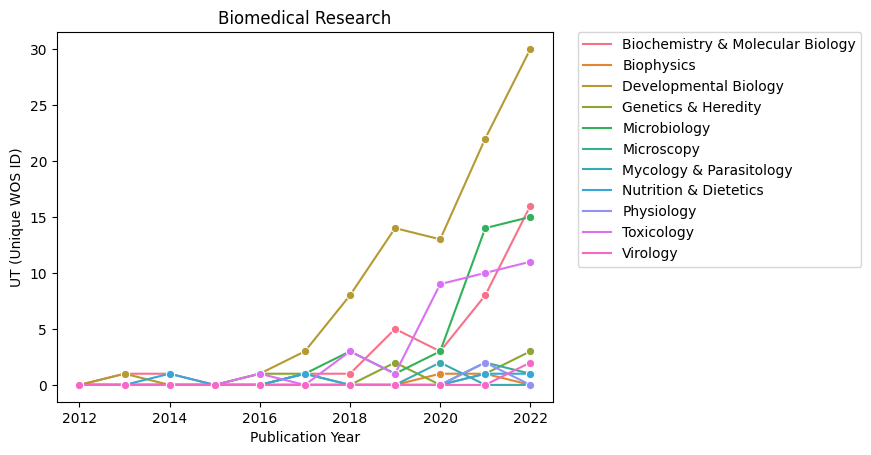

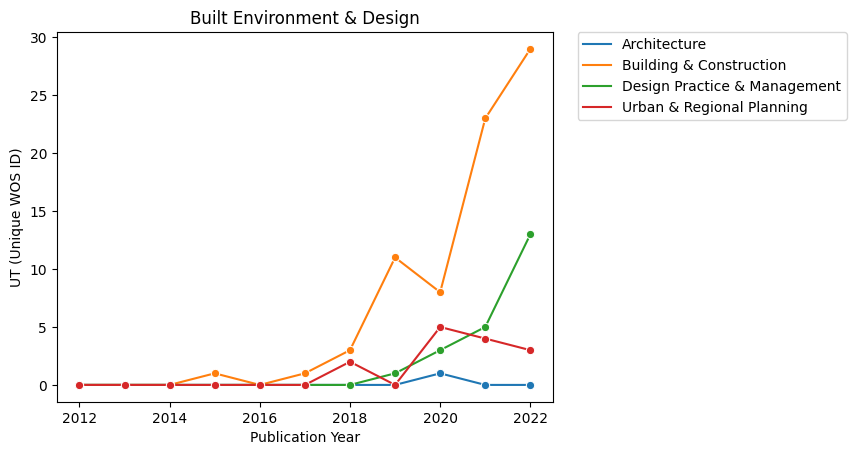

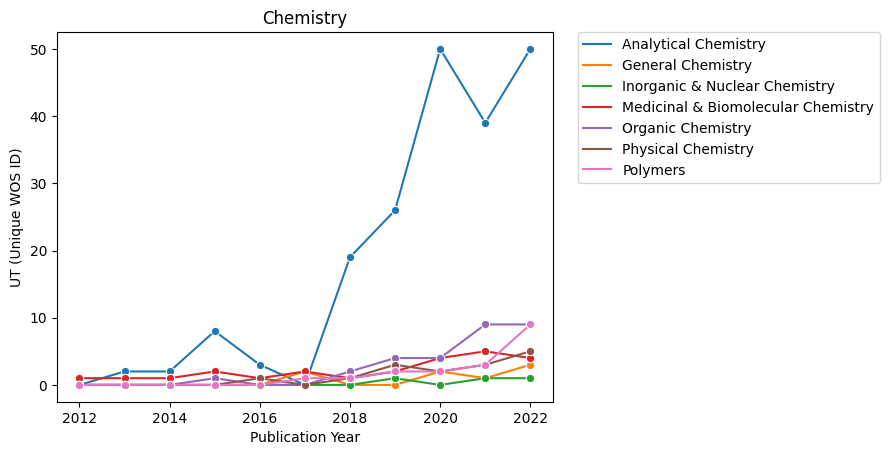

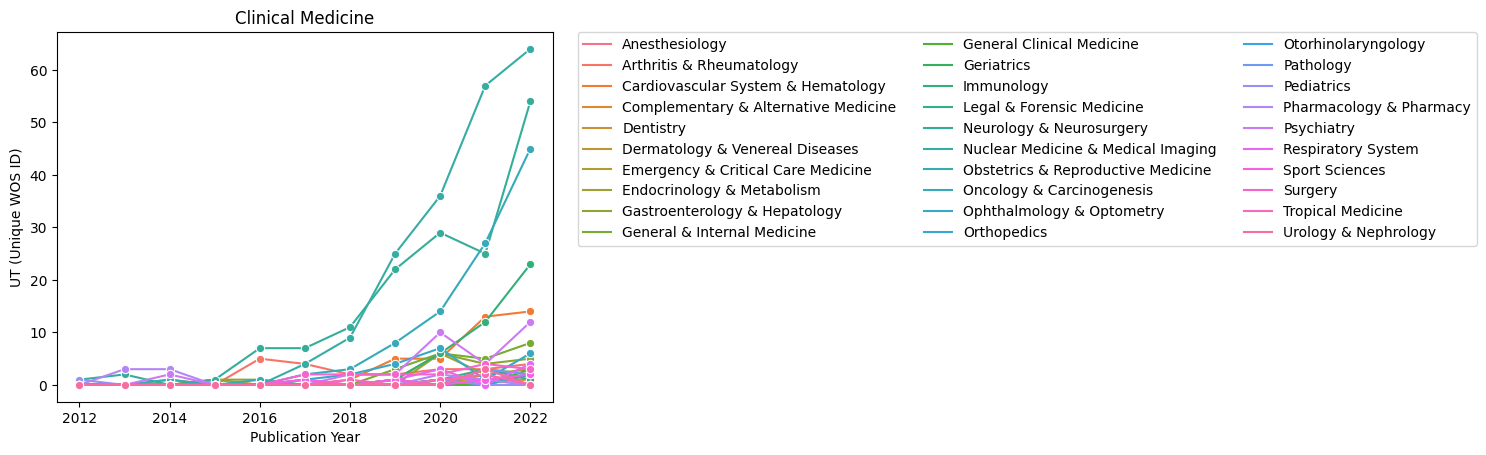

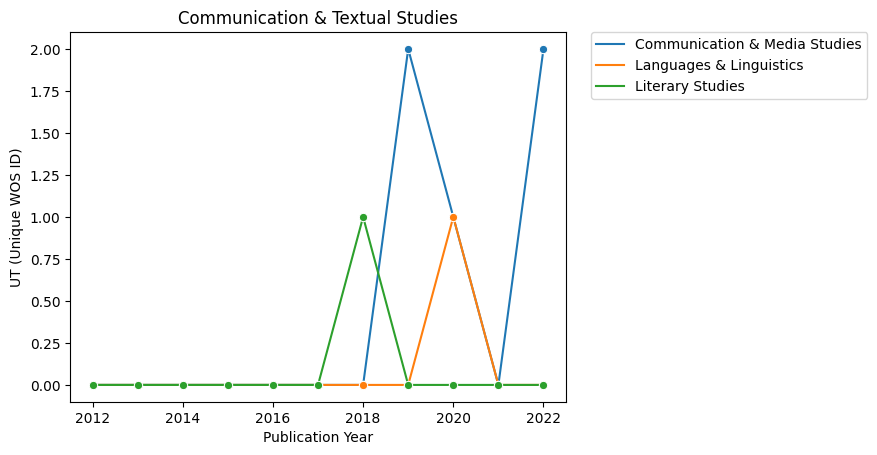

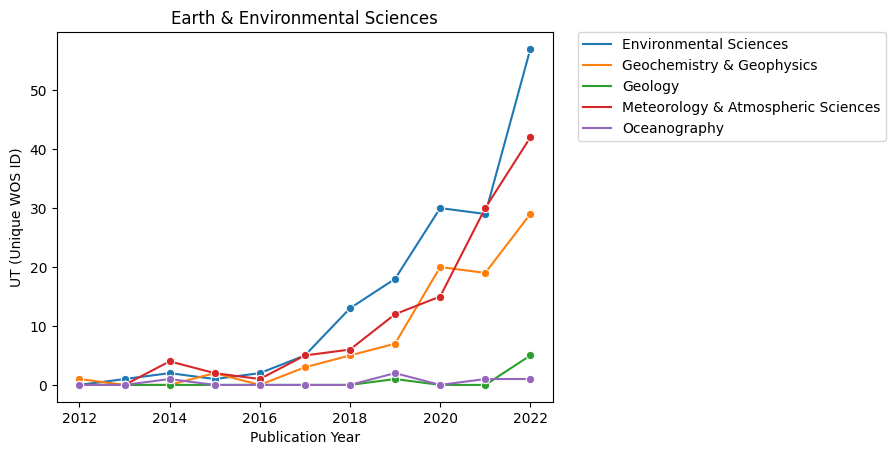

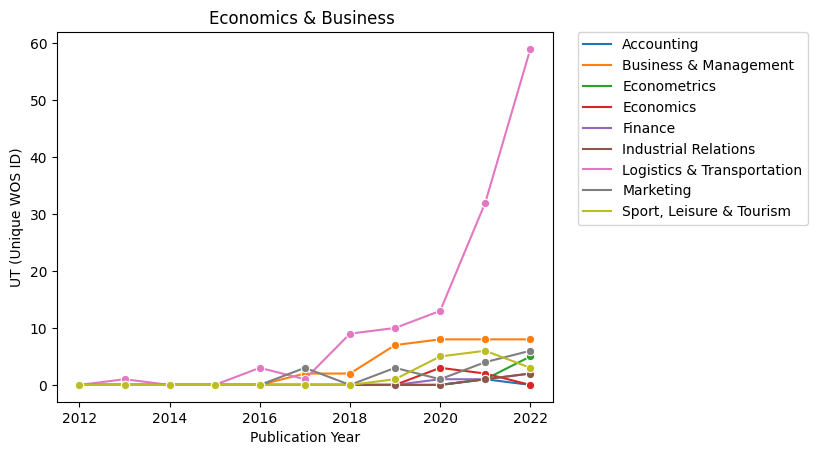

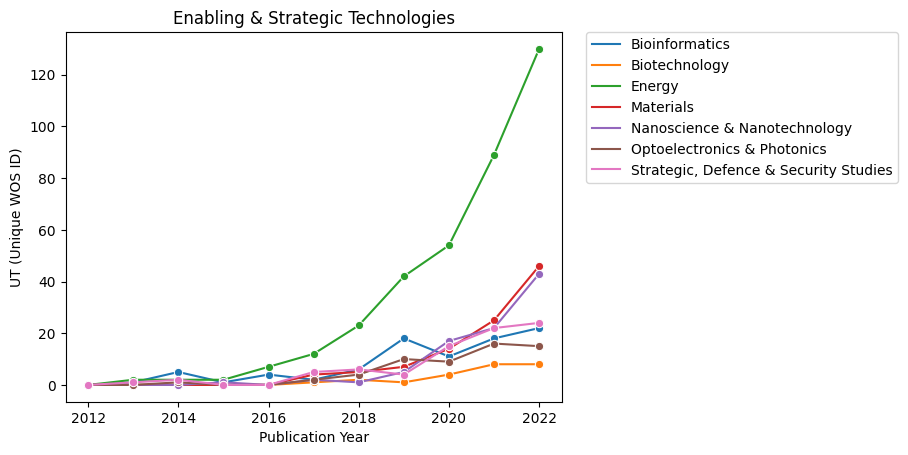

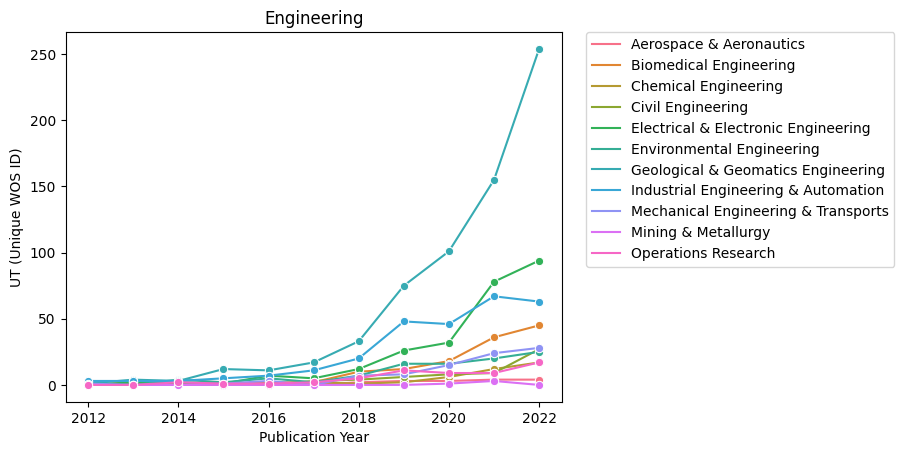

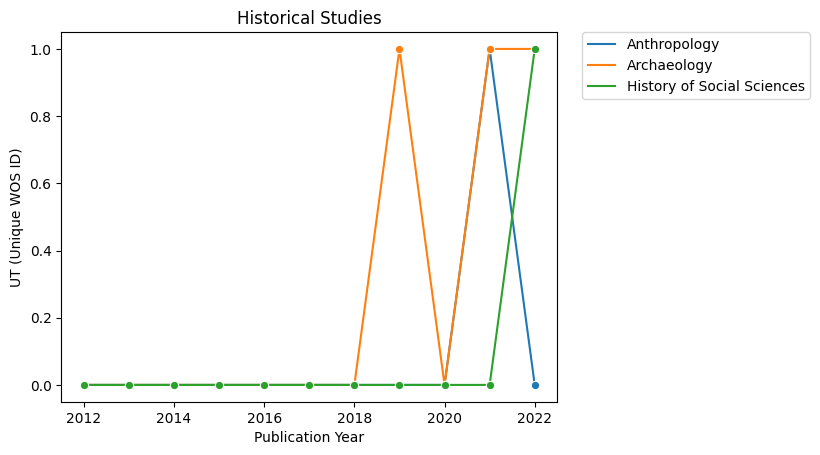

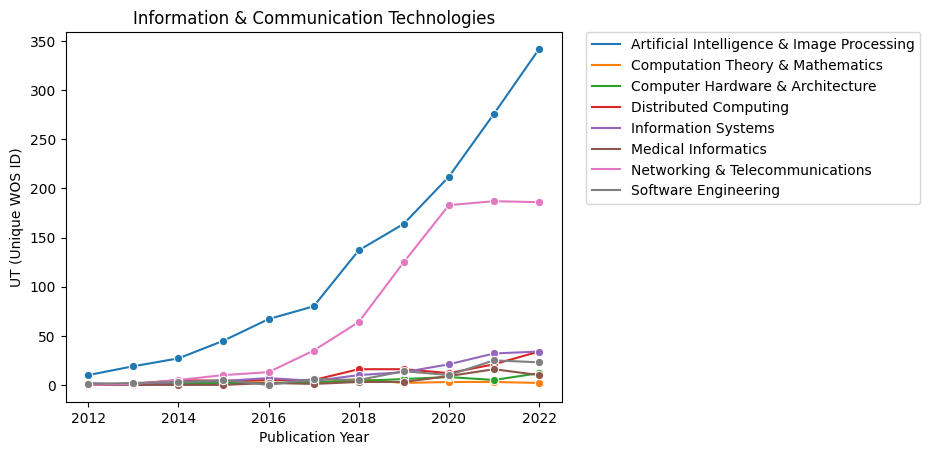

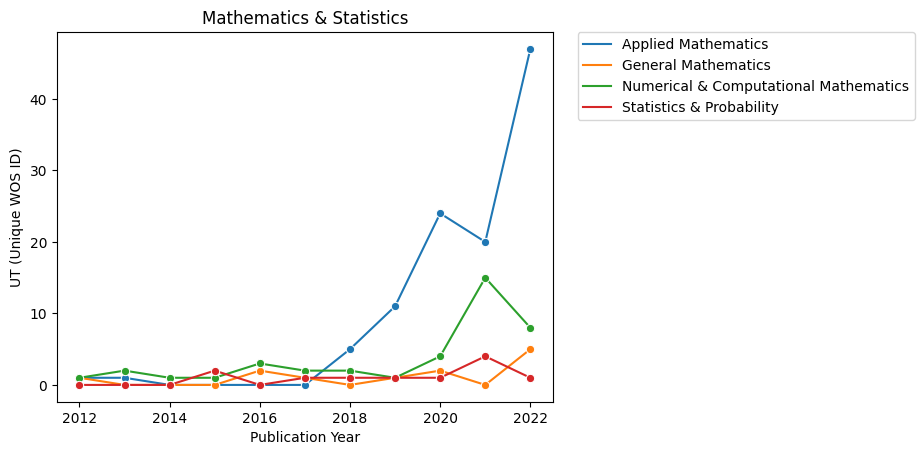

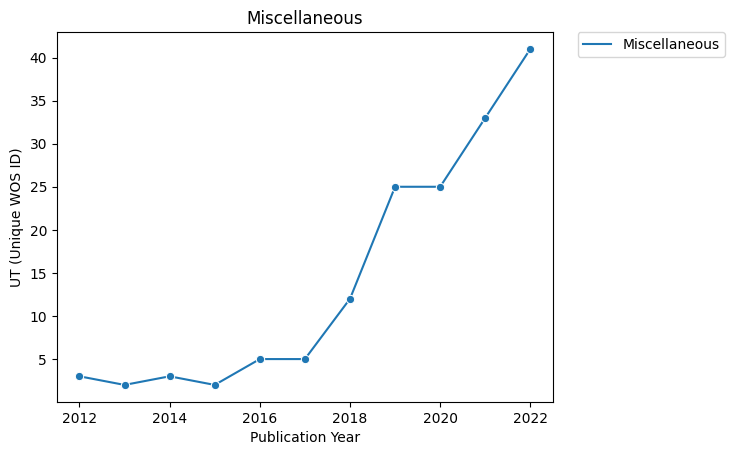

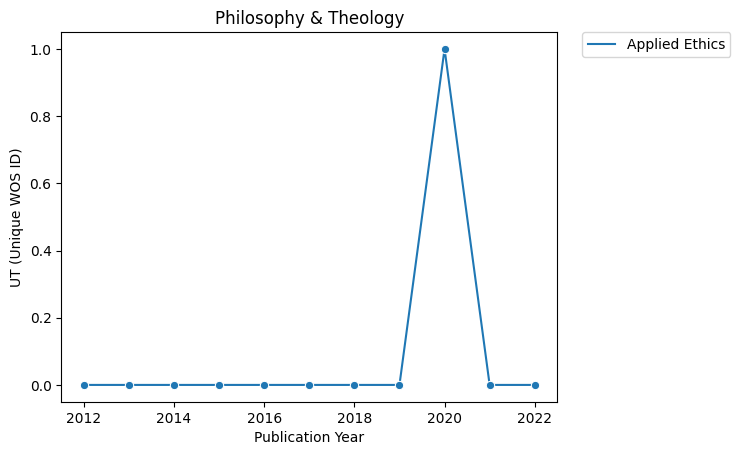

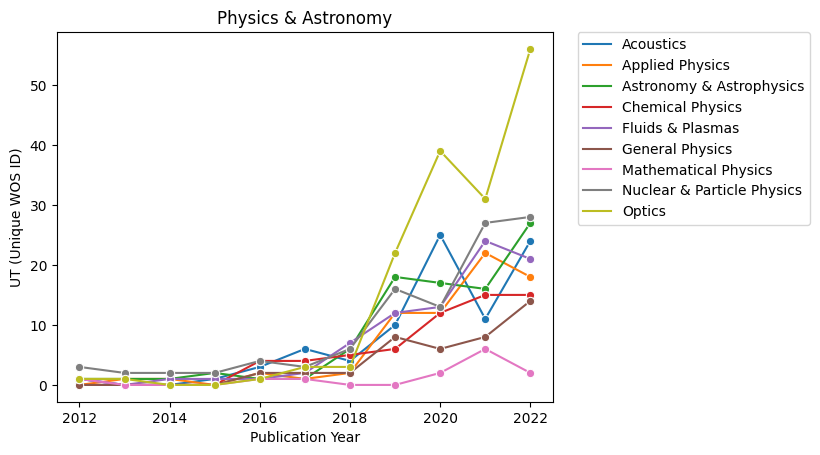

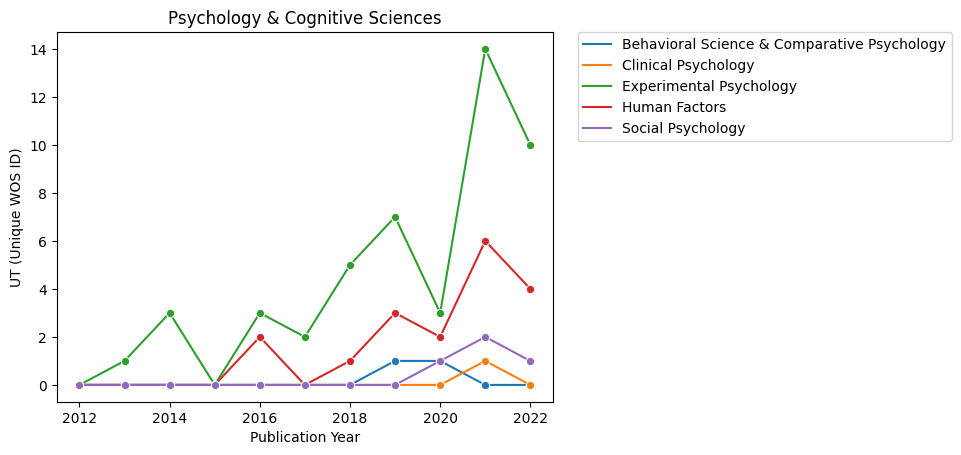

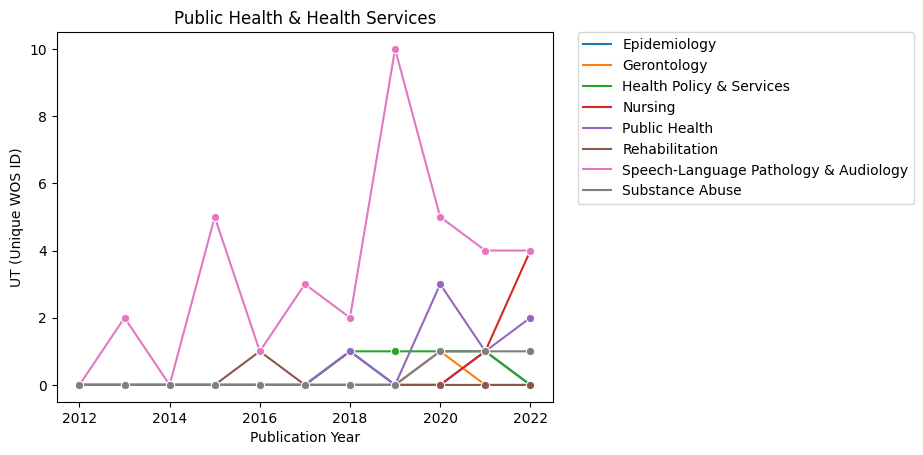

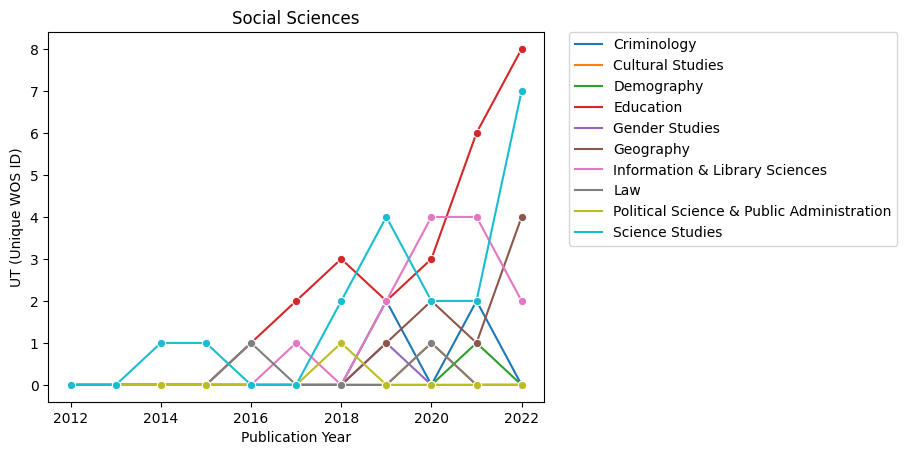

In [31]:
for cat in sorted(data[group[-2]].unique()):
    sub_data = data[data[group[-2]]==cat]
    sub_data = sub_data.complete({group[0]:range(int(data[group[0]].min()), int(data[group[0]].max()) + 1)}
                                 ,group[-1],fill_value=0)
    g=sns.lineplot(sub_data.sort_values(ascending=True, by=group[-1]),y=record_col,x=group[0],
                   hue=group[-1], marker="o")
    g.set(xticks=list(range(2012,2022+1,2)))
    g.legend(title=None,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncols=math.ceil(len(g.legend_.texts)/12))
    g.set_title(cat)
    plt.show()

## Collabs 

In [35]:
wos_collabs = wos_addresses[wos_addresses["Country_Type"]!="Other"][[record_col,"Country"]].drop_duplicates()

In [40]:
collab_desc = wos_collabs[wos_collabs["Country"]!="China"]["Country"].value_counts().reset_index()
collab_desc["percent"] = collab_desc["count"]/wos_collabs[record_col].nunique()
collab_desc["weight"] = collab_desc["count"]/wos_collabs[record_col].size
collab_desc

Country  count   percent    weight
0          Germany   2309  0.233492  0.101095
1           France   1632  0.165032  0.071454
2            Italy   1260  0.127414  0.055166
3      Netherlands   1063  0.107493  0.046541
4            Spain    987  0.099808  0.043214
5           Sweden    832  0.084134  0.036427
6          Finland    700  0.070786  0.030648
7          Denmark    566  0.057235  0.024781
8          Ireland    552  0.055820  0.024168
9          Belgium    499  0.050460  0.021848
10          Poland    486  0.049146  0.021278
11         Austria    373  0.037719  0.016331
12        Portugal    365  0.036910  0.015981
13          Greece    320  0.032359  0.014011
14         Hungary    181  0.018303  0.007925
15  Czech Republic    144  0.014562  0.006305
16         Romania    133  0.013449  0.005823
17        Slovenia    111  0.011225  0.004860
18        Slovakia     75  0.007584  0.003284
19       Lithuania     68  0.006876  0.002977
20         Estonia     65  0.006573  0.002846
21      Luxembourg     59  0.005966  0.002583
22         Croatia     56  0.005663  0.002452
23        Bulgaria     48  0.004854  0.002102
24          Cyprus     35  0.003539  0.001532
25          Latvia     20  0.002022  0.000876
26           Malta     13  0.001315  0.000569

In [41]:
wos_affiliations

UT (Unique WOS ID)                         Affiliations   
0      WOS:000209536100003        NATURAL HISTORY MUSEUM LONDON  \
1      WOS:000209536100003        BULGARIAN ACADEMY OF SCIENCES   
2      WOS:000297893800037      BEIJING INSTITUTE OF TECHNOLOGY   
3      WOS:000297893800037    UNIVERSIDAD POLITECNICA DE MADRID   
4      WOS:000301090100061                 UNIVERSITY OF LUBECK   
...                    ...                                  ...   
63585  WOS:000947693400001                    HUZHOU UNIVERSITY   
63586  WOS:000947693400001              SHANGHAITECH UNIVERSITY   
63587  WOS:000947693400001            SHANGHAI OCEAN UNIVERSITY   
63588  WOS:000947693400001        SHANGHAI JIAO TONG UNIVERSITY   
63589  WOS:000947693400001  UNIVERSITAT POLITECNICA DE VALENCIA   

                       Affiliations_merged  
0            NATURAL HISTORY MUSEUM LONDON  
1            BULGARIAN ACADEMY OF SCIENCES  
2          BEIJING INSTITUTE OF TECHNOLOGY  
3        UNIVERSIDAD POLITECNICA DE MADRID  
4                     UNIVERSITY OF LUBECK  
...                                    ...  
63585                    HUZHOU UNIVERSITY  
63586              SHANGHAITECH UNIVERSITY  
63587                  SHANGHAI UNIVERSITY  
63588                  SHANGHAI UNIVERSITY  
63589  UNIVERSITAT POLITECNICA DE VALENCIA  

[63590 rows x 3 columns]

In [44]:
wos.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [45]:
wos[["Affiliations","Addresses"]]

Affiliations   
0     University of Trento; University of Oviedo; Ts...  \
1     Peking University; University of Hamburg; Univ...   
2     Southeast University - China; University of Ca...   
3     Ocean University of China; Universidade de Lis...   
4     Beihang University; Ministry of Natural Resour...   
...                                                 ...   
8587  Shanghai Ocean University; Ministry of Natural...   
8588           Nanjing Audit University; WSB University   
8589  China University of Mining & Technology; Delft...   
8590  Nanjing University of Information Science & Te...   
8591  Nanjing University of Posts & Telecommunicatio...   

                                              Addresses  
0     [Salucci, Marco] Univ Trento, DICAM Dept Civil...  
1     [Huang, Yu; Fu, Zuntao] Peking Univ, Sch Phys,...  
2     [Feng, De-Cheng] Southeast Univ, Minist Educ, ...  
3     [Zhao, Yuliang; Dong, Sheng; Jiang, Fengyuan] ...  
4     [Li, Xiaohui; Yang, Dongkai] Beihang Univ, Sch...  
...                                                 ...  
8587  [He, Qi; Zha, Cheng; Song, Wei; Du, Yanling] S...  
8588  [Hasan, Md Morshadul] Nanjing Audit Univ, Sch ...  
8589  [Li, Yong; Cheng, Gang; Kuai, Moshen] China Un...  
8590  [Zeng, Rong; Zhang, Jiapeng] Nanjing Univ Info...  
8591  [Jia, Yan; Gao, Yun; Tang, Jing; Chen, Yixiang...  

[8592 rows x 2 columns]